**Análise acadêmica do conjunto de dados Palmer Penguins**

O conjunto de dados Palmer Penguins é bem reconhecido na área de análise de dados e aprendizado de máquina, sendo particularmente aplicado em estudos de classificação. Este conjunto de dados se apresenta como uma alternativa interessante ao clássico conjunto de dados Flor Iris, devido ao seu caráter lúdico e à capacidade de explorar características físicas e demográficas de diferentes espécies de pinguins. A coleta dos dados foi realizada pelo Dr. Kristen Gorman e sua equipe, e o conjunto está disponível no repositório de dados públicos do Centro de Ciência Polar da Universidade Estadual de Oregon.

**Objetivo do conjunto de dados**

O objetivo deste conjunto de dados é analisar as diferenças físicas entre três espécies distintas de pinguins, identificando suas características específicas e as localidades onde habitam, como suas ilhas. O conjunto de dados oferece a oportunidade estudarmos algoritmos de classificação, como o Random Forest, e identificação de padrões que possibilitam a distinção entre as espécies de pinguins.

Instalar o conjunto de dados `palmerpenguins` para acessar as informações dos pinguins, bem como importar as bibliotecas necessárias.

In [ ]:
# Instalar o conjunto de dados de pinguins
!pip install palmerpenguins

# Importando bibliotecas principais
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from palmerpenguins import load_penguins
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import warnings
warnings.filterwarnings("ignore")

Carregar o conjunto de dados e visualizar as primeiras linhas para entender melhor sua estrutura

In [ ]:
# Carregar o conjunto de dados
penguins = load_penguins()
print(penguins.head())


  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  year  
0       3750.0    male  2007  
1       3800.0  female  2007  
2       3250.0  female  2007  
3          NaN     NaN  2007  
4       3450.0  female  2007  


O conjunto de dados contém colunas como:

**species**: espécie do pinguim (Adelie, Gentoo, Chinstrap)

**island**: ilha onde o pinguim foi encontrado

**bill_length_mm**: comprimento do bico em milímetros

**bill_depth_mm**: profundidade do bico em milímetros

**flipper_length_mm**: comprimento da barbatana em milímetros

**body_mass_g**: massa corporal em gramas

**sex**: sexo do pinguim

In [ ]:
# Renomear colunas para português
penguins.rename(columns={
    'species': 'especie',
    'island': 'ilha',
    'bill_length_mm': 'comprimento_bico_mm',
    'bill_depth_mm': 'profundidade_bico_mm',
    'flipper_length_mm': 'comprimento_barbatana_mm',
    'body_mass_g': 'massa_corporal_g',
    'sex': 'sexo',
    'year': 'ano'
}, inplace=True)

# Visualizar as primeiras linhas para verificar a mudança
print(penguins.head())


  especie       ilha  comprimento_bico_mm  profundidade_bico_mm  \
0  Adelie  Torgersen                 39.1                  18.7   
1  Adelie  Torgersen                 39.5                  17.4   
2  Adelie  Torgersen                 40.3                  18.0   
3  Adelie  Torgersen                  NaN                   NaN   
4  Adelie  Torgersen                 36.7                  19.3   

   comprimento_barbatana_mm  massa_corporal_g    sexo   ano  
0                     181.0            3750.0    male  2007  
1                     186.0            3800.0  female  2007  
2                     195.0            3250.0  female  2007  
3                       NaN               NaN     NaN  2007  
4                     193.0            3450.0  female  2007  


Tratar dados ausentes e transformar variáveis categóricas em numéricas

In [ ]:
# Remover linhas com dados ausentes
penguins.dropna(inplace=True)

# Codificação das variáveis categóricas
penguins['especie'] = penguins['especie'].astype('category').cat.codes
penguins['ilha'] = penguins['ilha'].astype('category').cat.codes
penguins['sexo'] = penguins['sexo'].astype('category').cat.codes


Algumas visualizações para entender as relações entre as variáveis

Dispersão do comprimento da barbatana vs massa

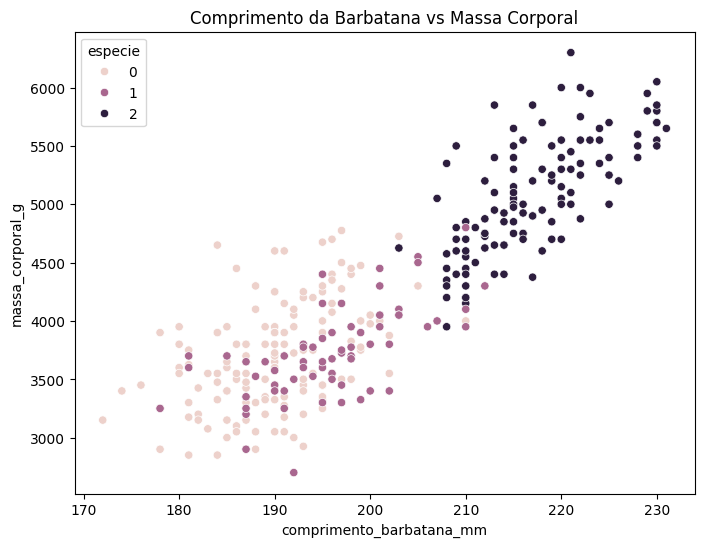

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=penguins, x="comprimento_barbatana_mm", y="massa_corporal_g", hue="especie")
plt.title("Comprimento da Barbatana vs Massa Corporal")
plt.show()


In [ ]:
penguins.describe()

,especie,ilha,comprimento_bico_mm,profundidade_bico_mm,comprimento_barbatana_mm,massa_corporal_g,sexo,ano
count,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000
mean,0.918919,0.651652,43.992793,17.164865,200.966967,4207.057057,0.504505,2008.042042
std,0.889718,0.714715,5.468668,1.969235,14.015765,805.215802,0.500732,0.812944
min,0.000000,0.000000,32.100000,13.100000,172.000000,2700.000000,0.000000,2007.000000
25%,0.000000,0.000000,39.500000,15.600000,190.000000,3550.000000,0.000000,2007.000000
50%,1.000000,1.000000,44.500000,17.300000,197.000000,4050.000000,1.000000,2008.000000
75%,2.000000,1.000000,48.600000,18.700000,213.000000,4775.000000,1.000000,2009.000000
max,2.000000,2.000000,59.600000,21.500000,231.000000,6300.000000,1.000000,2009.000000


Mapa de correlações

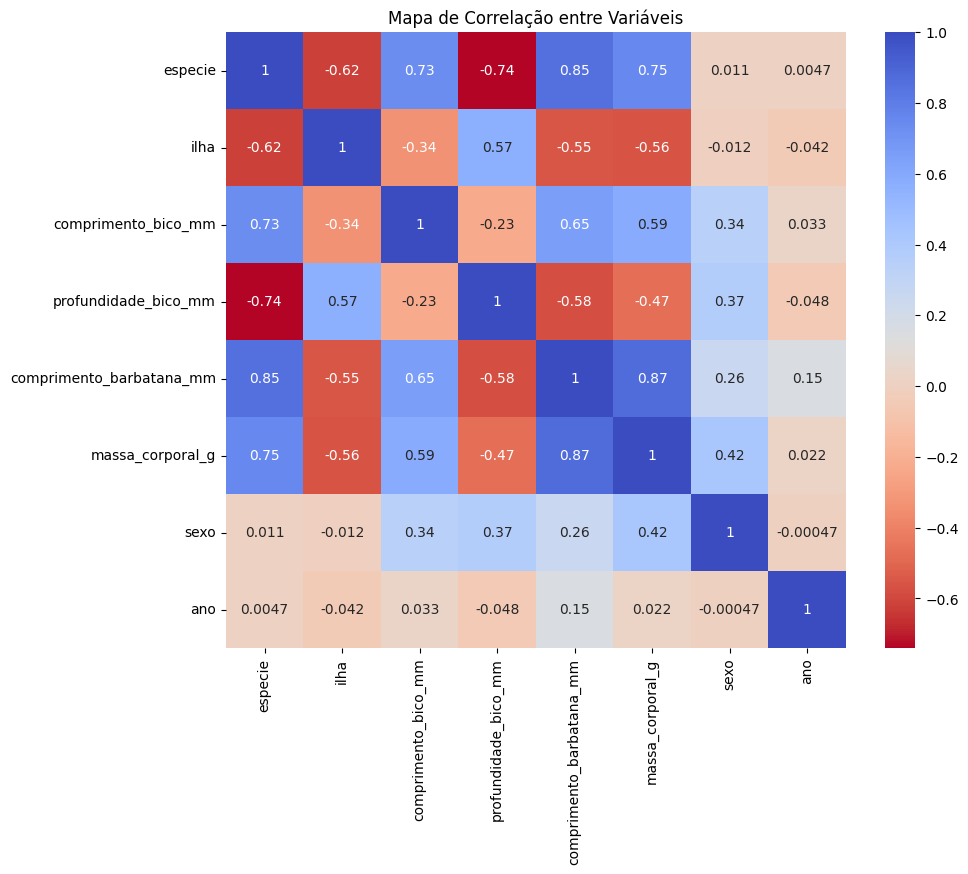

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(penguins.corr(), annot=True, cmap="coolwarm_r")
plt.title("Mapa de Correlação entre Variáveis")
plt.show()


Boxplot da massa por espécie

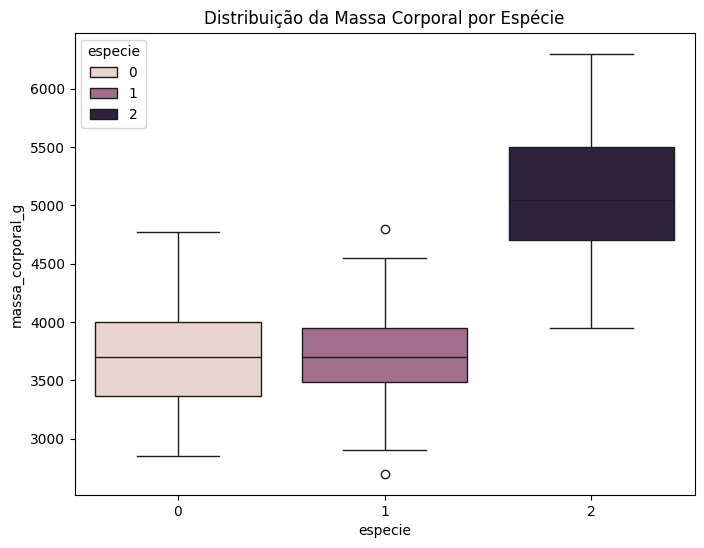

In [ ]:
plt.figure(figsize=(8,6))
sns.boxplot(data=penguins, x="especie", y="massa_corporal_g", hue="especie")
plt.title("Distribuição da Massa Corporal por Espécie")
plt.show()


Contagem de espécies por sexo

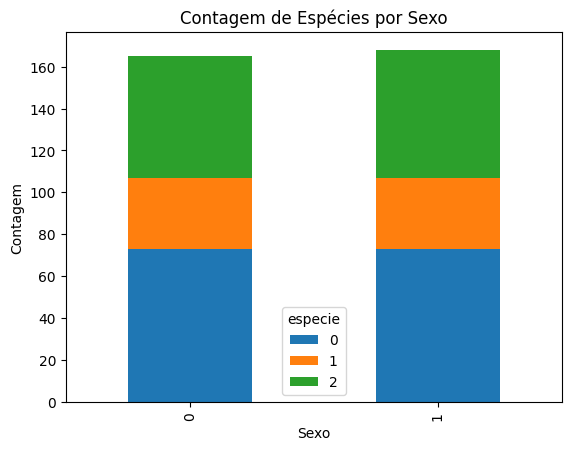

In [ ]:
pd.crosstab(penguins['sexo'], penguins['especie']).plot(kind='', stacked=True)
plt.title("Contagem de Espécies por Sexo")
plt.xlabel("Sexo")
plt.ylabel("Contagem")
plt.show()


Dividimos os dados em conjuntos de treinamento e teste para aplicar o modelo de Random Forest

In [ ]:
# Dividir dados em variáveis dependentes e independentes
X = penguins.drop("especie", axis=1)  # Dados de entrada
y = penguins["especie"]               # Variável alvo

# Dividir em dados de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)


Treinar o modelo e fazer previsões

In [ ]:
# Criar e treinar o modelo
model = RandomForestClassifier(n_estimators=100, random_state=1234)
model.fit(X_train, y_train)

# Previsão no conjunto de teste
y_pred = model.predict(X_test)


Avaliar o desempenho do modelo usando a acurácia

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia do Modelo: {accuracy:.2f}")


Acurácia do Modelo: 0.99


Avaliar o desempenho do modelo usando matriz de confusão

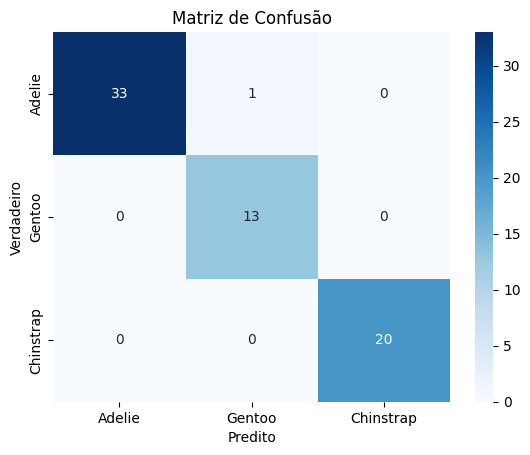

In [ ]:
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, cmap="Blues", fmt="d", xticklabels=['Adelie', 'Gentoo', 'Chinstrap'], yticklabels=['Adelie', 'Gentoo', 'Chinstrap'])
plt.xlabel("Predito")
plt.ylabel("Verdadeiro")
plt.title("Matriz de Confusão")
plt.show()


Avaliar o desempenho do modelo usando a acurácia, matriz de confusão e um relatório de classificação

In [ ]:
print(______(y_test, y_pred, target_names=['Adelie', 'Gentoo', 'Chinstrap']))


              precision    recall  f1-score   support

      Adelie       1.00      0.97      0.99        34
      Gentoo       0.93      1.00      0.96        13
   Chinstrap       1.00      1.00      1.00        20

    accuracy                           0.99        67
   macro avg       0.98      0.99      0.98        67
weighted avg       0.99      0.99      0.99        67



A importância das variáveis ajuda a identificar quais atributos são mais relevantes para o modelo

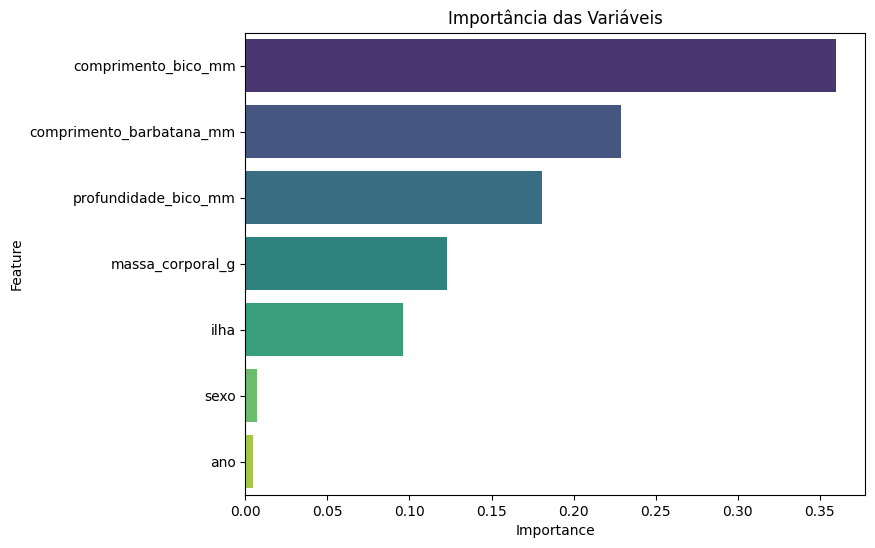

In [ ]:
importances = model.feature_importances_
features = X.columns
importance_df = pd.DataFrame({"Feature": features, "Importance": importances})
importance_df = importance_df.sort_values(by="Importance", ascending=False)

# Plotar gráfico de barras para importância das variáveis
plt.figure(figsize=(8,6))
sns.barplot(data=importance_df, x="Importance", y="Feature", palette="viridis")
plt.title("Importância das Variáveis")
plt.show()


## K-Means

In [ ]:
# Importando bibliotecas principais
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from palmerpenguins import load_penguins
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


In [ ]:
# Carregar o conjunto de dados
penguins = load_penguins()

# Remover linhas com dados faltantes
penguins.dropna(inplace=True)

# Renomear colunas para português
penguins.rename(columns={
    'species': 'especie',
    'island': 'ilha',
    'bill_length_mm': 'comprimento_bico_mm',
    'bill_depth_mm': 'profundidade_bico_mm',
    'flipper_length_mm': 'comprimento_barbatana_mm',
    'body_mass_g': 'massa_corporal_g',
    'sex': 'sexo',
    'year': 'ano'
}, inplace=True)


In [ ]:
# Codificação das variáveis categóricas
penguins['especie'] = penguins['especie'].astype('category').cat.codes
penguins['ilha'] = penguins['ilha'].astype('category').cat.codes
penguins['sexo'] = penguins['sexo'].astype('category').cat.codes


In [ ]:
# Filtrar apenas as colunas numéricas relevantes para o K-means
data_kmeans = penguins[['comprimento_bico_mm', 'profundidade_bico_mm',
                         'comprimento_barbatana_mm', 'massa_corporal_g']]


In [ ]:
# Normalizar os dados
scaler = StandardScaler()
data_kmeans_normalized = scaler.fit_transform(data_kmeans)


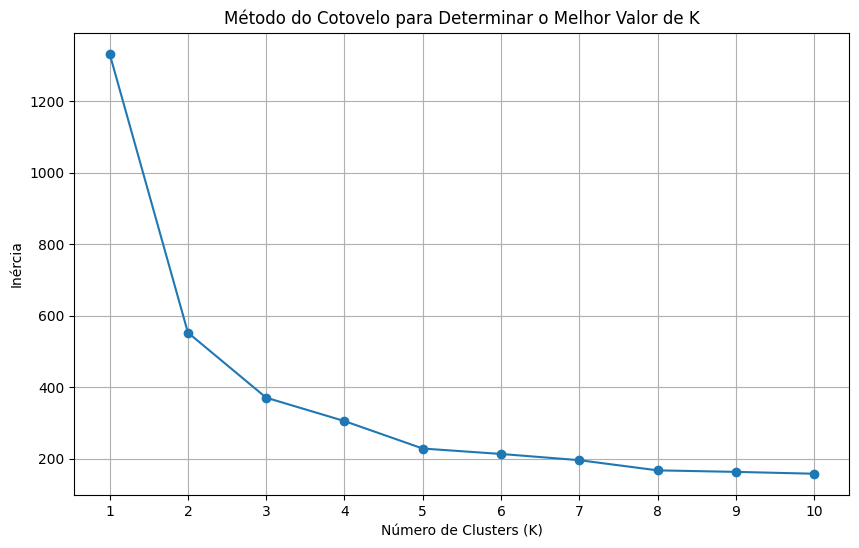

In [ ]:
# Determinar o melhor valor de K usando o método do cotovelo
inertia = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=1234)
    kmeans.fit(data_kmeans_normalized)  # Usar dados normalizados
    inertia.append(kmeans.inertia_)

# Plotar o gráfico do método do cotovelo
plt.figure(figsize=(10, 6))
plt.plot(k_values, inertia, marker='o')
plt.title("Método do Cotovelo para Determinar o Melhor Valor de K")
plt.xlabel("Número de Clusters (K)")
plt.ylabel("Inércia")
plt.xticks(k_values)
plt.grid()
plt.show()


In [ ]:
# Escolhendo o valor de K
optimal_k = 3  # Exemplo, pode ser ajustado com base no gráfico


In [ ]:
# Aplicar o K-means
kmeans = KMeans(n_clusters=optimal_k, random_state=1234)
penguins['cluster'] = kmeans.fit_predict(data_kmeans_normalized)  # Usar dados normalizados

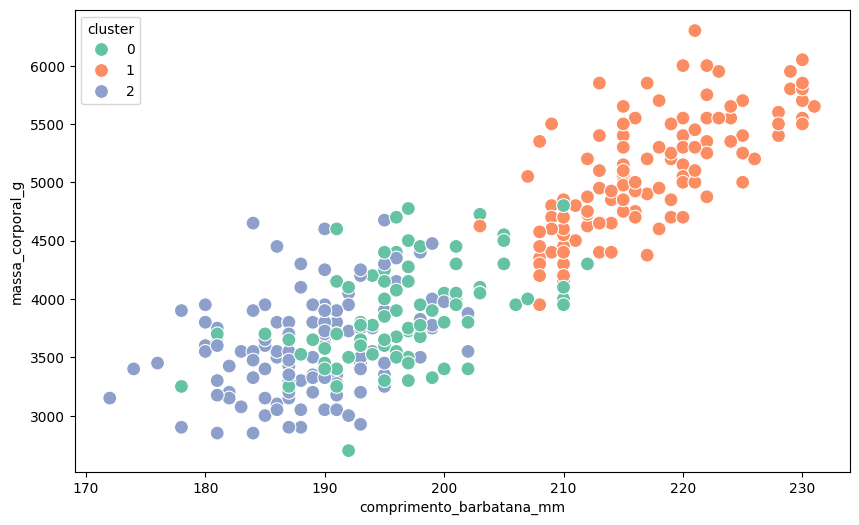

In [ ]:
# Visualizar os clusters com um scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=penguins, x='comprimento_barbatana_mm',
                y='massa_corporal_g', hue='cluster', palette='Set2', s=100)
plt.show()

In [ ]:
# Calcular os centróides
centroides = kmeans.cluster_centers_


In [ ]:
# Inverter a normalização para os centróides (usando o mesmo scaler)
centroides_original = scaler.inverse_transform(centroides)


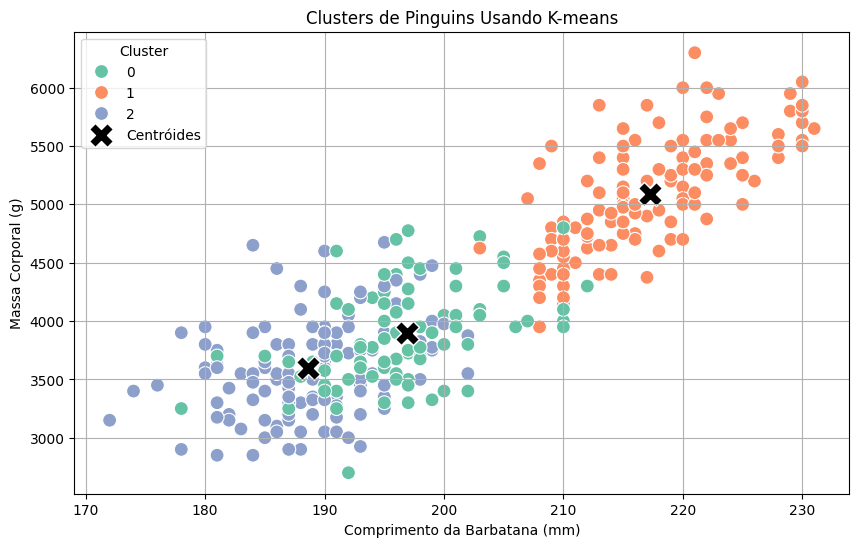

In [ ]:
# Visualizar os clusters com um scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=penguins, x='comprimento_barbatana_mm',
                y='massa_corporal_g', hue='cluster', palette='Set2', s=100)

# Adicionar os centróides ao gráfico
plt.scatter(centroides_original[:, 2], centroides_original[:, 3],
            s=300, c='black', marker='X', label='Centróides', edgecolor='w')

plt.title("Clusters de Pinguins Usando K-means")
plt.xlabel("Comprimento da Barbatana (mm)")
plt.ylabel("Massa Corporal (g)")
plt.legend(title='Cluster')
plt.grid()
plt.show()


In [ ]:
import networkx as nx
import plotly.graph_objs as go
from palmerpenguins import load_penguins
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import plotly.express as px
import numpy as np

# Carregar os dados do conjunto de dados Palmer Penguins
penguins = load_penguins()
penguins.dropna(inplace=True)  # Remover linhas com dados faltantes

# Renomear colunas para português
penguins.rename(columns={
    'species': 'especie',
    'island': 'ilha',
    'bill_length_mm': 'comprimento_bico_mm',
    'bill_depth_mm': 'profundidade_bico_mm',
    'flipper_length_mm': 'comprimento_barbatana_mm',
    'body_mass_g': 'massa_corporal_g',
    'sex': 'sexo',
    'year': 'ano'
}, inplace=True)

# Filtrar apenas as colunas numéricas relevantes para o K-means
data_kmeans = penguins[['comprimento_bico_mm', 'profundidade_bico_mm',
                         'comprimento_barbatana_mm', 'massa_corporal_g']]

# Treinar o modelo KMeans
kmeans = KMeans(n_clusters=3, random_state=1234, verbose=0)
kmeans.fit(data_kmeans)

# Reduzir a dimensionalidade dos dados usando PCA
pca = PCA(n_components=3, random_state=1234)
data_pca = pca.fit_transform(data_kmeans)

# Atualizar a posição dos centroides com base nos dados transformados pelo PCA
centroides_transformados = pca.transform(kmeans.cluster_centers_)

# Criar o grafo
g = nx.Graph()

# Adicionar as arestas ao grafo (não é necessário para visualização em 3D, mas está no seu código)
for i, row in enumerate(kmeans.cluster_centers_):
    for j, col in enumerate(kmeans.cluster_centers_):
        if i != j:
            g.add_edge(i, j, weight=np.linalg.norm(row - col))

# Criar um mapeamento de cores para as classes
color_map = px.colors.qualitative.Plotly

# Criar um dicionário para mapear as classes aos seus respectivos índices de cores
class_color_map = {i: color_map[i] for i in range(len(np.unique(kmeans.labels_)))}

# Criando os pontos de dados originais para cada classe
data_traces = []
for i in np.unique(kmeans.labels_):
    indices = np.where(kmeans.labels_ == i)[0]
    x_data = data_pca[indices, 0]
    y_data = data_pca[indices, 1]
    z_data = data_pca[indices, 2]
    data_trace = go.Scatter3d(
        x=x_data,
        y=y_data,
        z=z_data,
        mode='markers',
        marker=dict(symbol='circle',
                    size=5,
                    color=class_color_map[i],  # Usando as cores mapeadas para as classes
                    line=dict(color='rgb(50,50,50)', width=0.5)
                    ),
        text=indices,
        hoverinfo='text'
    )
    data_traces.append(data_trace)

# Criando os pontos de centroides
centroid_trace = go.Scatter3d(
    x=centroides_transformados[:, 0],
    y=centroides_transformados[:, 1],
    z=centroides_transformados[:, 2],
    mode='markers',
    marker=dict(symbol='circle',
                size=10,
                color='black',  # Cor preta para os centroides
                line=dict(color='rgb(50,50,50)', width=0.5)
                ),
    text=['Centroide 1', 'Centroide 2', 'Centroide 3'],
    hoverinfo='text'
)

# Criando o layout da figura
layout = go.Layout(
    title="Visualização Interativa em 3D dos Pinguins com K-means",
    titlefont=dict(size=16),
    showlegend=False,
    scene=dict(
        xaxis=dict(title='PC1'),
        yaxis=dict(title='PC2'),
        zaxis=dict(title='PC3'),
        camera=dict(eye=dict(x=1.2, y=1.2, z=1.2))
    )
)

# Criando a figura
fig = go.Figure(data=data_traces + [centroid_trace], layout=layout)

# Exibindo a visualização
fig.show()